# Ranking (hacker news hot) analysis for vtalks.net

## Introduction

In [398]:
!pwd

/Users/raul/Projects/vtalks/jupyter


### Setup & Configuration <a class="anchor" id="setup-and-configuration"></a>

In [399]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

seaborn.set()
plt.rc('figure', figsize=(16,8))
plt.style.use('bmh')

### Load the Data Set <a class="anchor" id="load-the-dataset"></a>

In [335]:
# data_source = "../.dataset/vtalks_dataset_2018.csv"
# data_source = "../.dataset/vtalks_dataset_2017.csv"
# data_source = "../.dataset/vtalks_dataset_2016.csv"
# data_source = "../.dataset/vtalks_dataset_2015.csv"
# data_source = "../.dataset/vtalks_dataset_2014.csv"
# data_source = "../.dataset/vtalks_dataset_2013.csv"
# data_source = "../.dataset/vtalks_dataset_2012.csv"
# data_source = "../.dataset/vtalks_dataset_2011.csv"
# data_source = "../.dataset/vtalks_dataset_2010.csv"
data_source = "../.dataset/vtalks_dataset_all.csv"

data_set = pd.read_csv(
    data_source,
    parse_dates=[1],
    dtype={
        'id': int,
        'youtube_view_count': int, 
        'youtube_like_count': int,
        'youtube_dislike_count': int,
        'youtube_favorite_count': int,
        'view_count': int, 
        'like_count': int,
        'dislike_count': int,
        'favorite_count': int
    })

In [336]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20334 entries, 0 to 20333
Data columns (total 10 columns):
id                        20334 non-null int64
created                   20334 non-null datetime64[ns]
youtube_view_count        20334 non-null int64
youtube_like_count        20334 non-null int64
youtube_dislike_count     20334 non-null int64
youtube_favorite_count    20334 non-null int64
view_count                20334 non-null int64
like_count                20334 non-null int64
dislike_count             20334 non-null int64
favorite_count            20334 non-null int64
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.6 MB


In [337]:
data_set.describe()

,id,youtube_view_count,youtube_like_count,youtube_dislike_count,youtube_favorite_count,view_count,like_count,dislike_count,favorite_count
count,20334.000000,2.033400e+04,20334.00000,20334.000000,20334.0,20334.000000,20334.000000,20334.000000,20334.000000
mean,10181.567572,3.565610e+03,39.11257,2.028278,0.0,14.350103,0.001426,0.000590,0.000639
std,5873.637497,3.985849e+04,390.70535,42.725312,0.0,11.872966,0.059075,0.051531,0.025277
min,1.000000,0.000000e+00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,5097.250000,1.940000e+02,1.00000,0.000000,0.0,7.000000,0.000000,0.000000,0.000000
50%,10182.500000,5.580000e+02,5.00000,0.000000,0.0,13.000000,0.000000,0.000000,0.000000
75%,15265.750000,1.806000e+03,18.00000,1.000000,0.0,17.000000,0.000000,0.000000,0.000000
max,20356.000000,4.039133e+06,36379.00000,4302.000000,0.0,228.000000,7.000000,7.000000,1.000000


## Youtube Ranking Analysis <a class="anchor" id="youtube-statistics-analysis"></a>

### Youtube Hacker Hot

In [404]:
df = pd.DataFrame({
    'id': data_set.id,
    'created': data_set.created,
    'youtube_like_count': data_set.youtube_like_count,
    'youtube_dislike_count': data_set.youtube_dislike_count,
})

In [405]:
# from ranking_sorting.hackernews_hot import hackernews_hot

def hackernews_hot(votes, published, gravity=1.8):
    """ Hacker news' hot sort
    """
    d = datetime.datetime.now() - published
    hour_age = d.total_seconds() // 3600
    res = votes / math.pow(hour_age + 2, gravity)
    return res

size = len(df.index)
rank_hackernews_hot = np.zeros(shape=(size,1), dtype=float)
for i, el in enumerate(range(size)):
    votes = abs(df.youtube_like_count[i] - df.youtube_dislike_count[i])
    created = df.created[i].to_pydatetime()
    rank_hackernews_hot[i] = hackernews_hot(votes, created, gravity=1.8)
    
df.loc[:, 'rank_hackernews_hot'] = rank_hackernews_hot

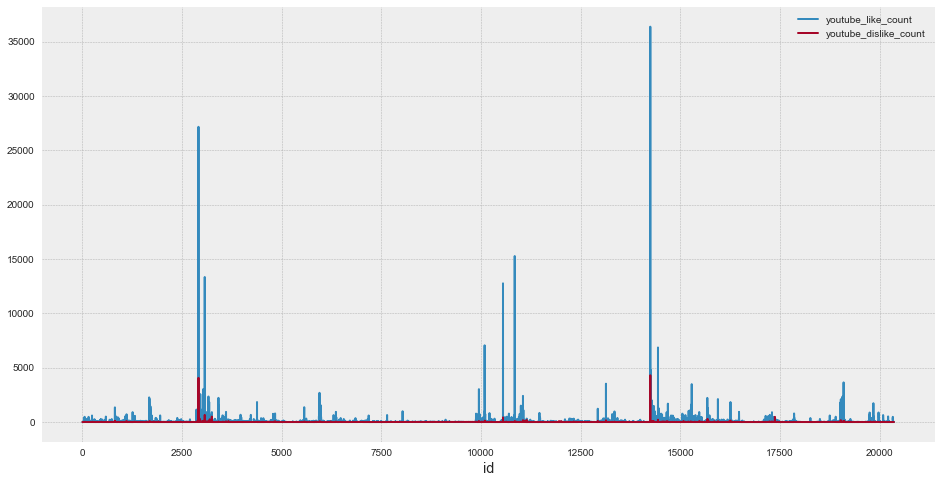

In [372]:
plot_df = pd.DataFrame({
    'id': df.id,
    'youtube_like_count': df.youtube_like_count,
    'youtube_dislike_count': df.youtube_dislike_count,
})

plot_df.plot(x='id');

,id,rank_hackernews_hot
count,20334.000000,2.033400e+04
mean,10181.567572,1.209490e-05
std,5873.637497,3.354135e-04
min,1.000000,0.000000e+00
25%,5097.250000,1.167639e-08
50%,10182.500000,1.530909e-07
75%,15265.750000,1.164196e-06
max,20356.000000,4.424204e-02


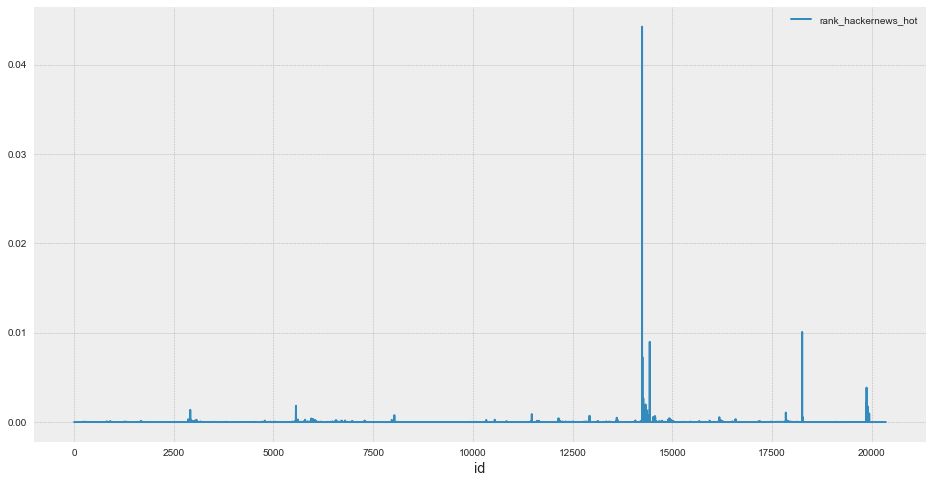

In [409]:
plot_df = pd.DataFrame({
    'id': df.id,
    'rank_hackernews_hot': df.rank_hackernews_hot,
})

plot_df.plot(x='id');

plot_df.describe()

### Plotting 2018

,rank_hackernews_hot
count,3.927000e+03
mean,5.646850e-05
std,7.622220e-04
min,0.000000e+00
25%,3.284638e-07
50%,3.084716e-06
75%,1.594695e-05
max,4.428627e-02


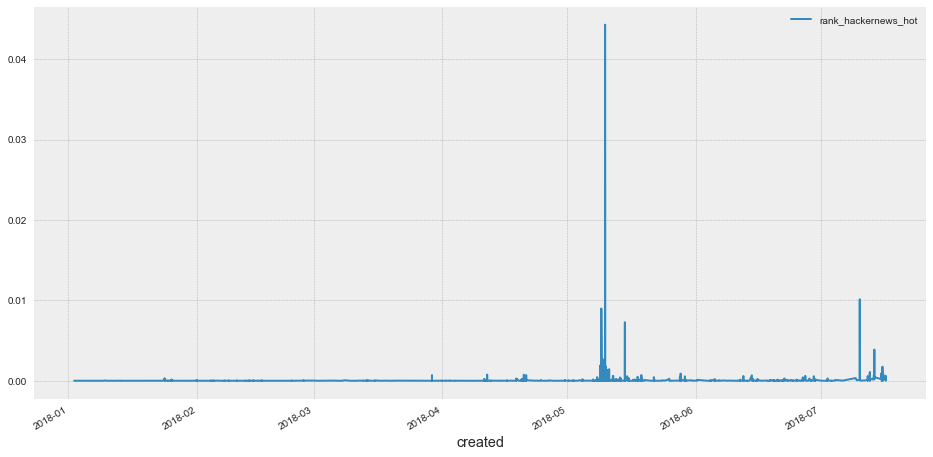

In [396]:
from datetime import date

value_to_check = pd.Timestamp(date.today().year, 1, 1)
filter_mask = df['created'] > value_to_check
filtered_df = df[filter_mask]
filtered_df

plot_df = pd.DataFrame({
    'created': filtered_df.created,
    'rank_hackernews_hot': filtered_df.rank_hackernews_hot,
})

plot_df.plot(x='created');

plot_df.describe()

### Plotting current month

,rank_hackernews_hot
count,136.000000
mean,0.000349
std,0.000948
min,0.000000
25%,0.000033
50%,0.000188
75%,0.000361
max,0.010078


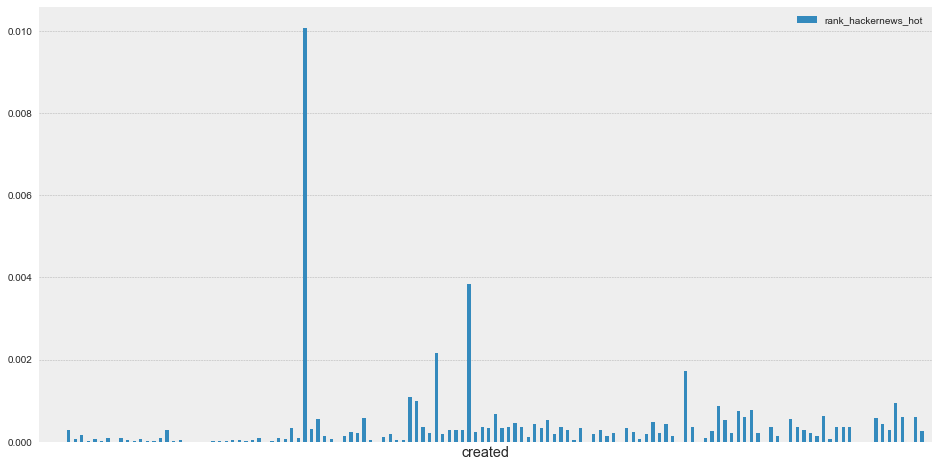

In [411]:
from datetime import date

value_to_check = pd.Timestamp(date.today().year, date.today().month, 1)
filter_mask = df['created'] > value_to_check
filtered_df = df[filter_mask]
filtered_df

plot_df = pd.DataFrame({
    'created': filtered_df.created,
    'rank_hackernews_hot': filtered_df.rank_hackernews_hot,
})

plot_df.plot.bar(x='created');
plt.xticks([])

plot_df.describe()